# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [2]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [3]:
L = 50 / 100  # meters
Rw = 30 / 100  # meters

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [4]:
def draw_wheelchair(x, y, theta):
    points_x = [x+L/2*np.sin(theta), x+L/2*np.sin(theta)+L*np.cos(theta), x-L/2*np.sin(theta)+L*np.cos(theta), x-L/2*np.sin(theta), x+L/2*np.sin(theta)]
    points_y = [y-L/2*np.cos(theta), y-L/2*np.cos(theta)+L*np.sin(theta), y+L/2*np.cos(theta)+L*np.sin(theta), y+L/2*np.cos(theta), y-L/2*np.cos(theta)]
    
    for i in range(len(points_x) - 1):
        plt.plot([points_x[i], points_x[i+1]], [points_y[i], points_y[i+1]])
    
    plt.plot([x-L/2*np.sin(theta)-Rw*np.cos(theta), x-L/2*np.sin(theta)+Rw*np.cos(theta)], [y+L/2*np.cos(theta)-Rw*np.sin(theta), y+L/2*np.cos(theta)+Rw*np.sin(theta)], linewidth=10)
    plt.plot([x+L/2*np.sin(theta)-Rw*np.cos(theta), x+L/2*np.sin(theta)+Rw*np.cos(theta)], [y-L/2*np.cos(theta)-Rw*np.sin(theta), y-L/2*np.cos(theta)+Rw*np.sin(theta)], linewidth=10)
#     xlim(x - 2*L, x + 2*L)
#     ylim(y - 2*L, y + 2*L)
#     gca().set_aspect('equal')

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [5]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 8, 8 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

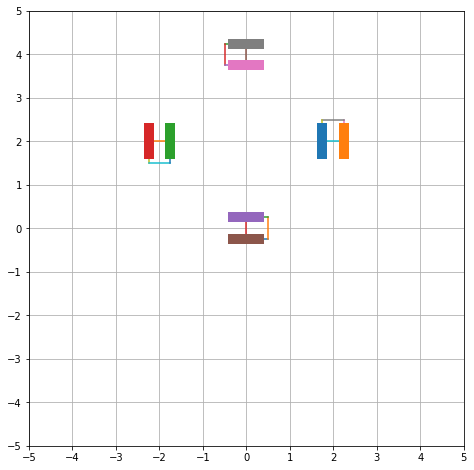

In [13]:
draw_arena(-5, 5, -5, 5)
draw_wheelchair(0, 0, 0)
draw_wheelchair(2, 2, pi/2)
draw_wheelchair(0, 4, pi)
draw_wheelchair(-2, 2, 3*pi/2)

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:**

the velocity of the center of each wheel is given by :
<br>
$$
\begin{aligned}
v_l & =R_w \omega_l \\
v_r & =R_w \omega_r
\end{aligned}
$$
<br>
The velocity of the wheel axis center C can be computed as the average of the velocities of the two wheels:
<br>
$$
v_C=\frac{v_l+v_r}{2}=\frac{R_w}{2}\left(\omega_l+\omega_r\right)
$$
<br>
The direction of the velocity of the center of the wheel axis is the direction of the vector , thus:
<br>
$$
\begin{aligned}
& \dot{x}=v_C \cos \theta \\
& \dot{y}=v_C \sin \theta
\end{aligned}
$$
<br>
Finally, the angular velocity of the wheelchair is given by the difference of the velocities of the two wheels divided by the distance between the wheels:
<br>
$$
\dot{\theta}=\frac{v_r-v_l}{L}=\frac{R_w}{L}\left(\omega_r-\omega_l\right)
$$
<br>
Therefore, the differential equations relating  are:
<br>
$$
\begin{aligned}
& \dot{x}=\frac{R_w}{2}\left(\omega_l+\omega_r\right) \cos \theta \\
& \dot{y}=\frac{R_w}{2}\left(\omega_l+\omega_r\right) \sin \theta \\
& \dot{\theta}=\frac{R_w}{L}\left(\omega_r-\omega_l\right)
\end{aligned}
$$

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

#### Answer:

From the previous question, we can see that $\dot\theta$ is function of $\omega_{l}$ and $\omega_{r}$ ($\dot\theta = \frac{R_w}{L} (\omega_r - \omega_l))$. Thus, if $\omega_l$ and $\omega_r$ are continuously differentiable functions, then $\dot\theta$ is also.$\\$
Therefore, $\theta$ is continuously differentiable function, which means $cos(\theta)$ and $sin(\theta)$ are continuously differentiable.
Moreover, we can see that $\dot{x}$ and $\dot{y}$ are functions of $\omega_{l}$, $\omega_{r}$ and $\theta$.
Hence, $\dot{x}$ and $\dot{y}$ are continuously differentiable.

$\implies$ From the UNIQUENESS, CONTINUITY and EXISTENCE theorems we can derive that **_the system is well-posed_**.

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:**


If $\omega_l$ and $\omega_r$ are constants: 
$$\quad \quad \theta(t) = \frac{R_w}{L}\left(\omega_r-\omega_l\right).t \\$$
$$ \quad \quad x(t) = \frac{L}{2}\frac{\omega_r+\omega_l}{\omega_r-\omega_l} \sin(\theta(t)) $$

$$ \quad \quad y(t) = - \frac{L}{2}\frac{\omega_r+\omega_l}{\omega_r-\omega_l} \cos(\theta(t))$$

We can see that these solutions are finite for $t < \infty$. $\\$
$\implies$ Therefore, the maximal solution associated to any initial state is global.

If  $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$.

$\quad$ If  $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$.
The system becomes depend on the variables x, y, and 𝜃, the variation of these variables over time can tend towards infinity with certain initial values.

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [7]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [8]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_l, omega_r = omega(t, xytheta)
    dx = (Rw/2) * (omega_r + omega_l)*cos(theta)
    dy = (Rw/2) * (omega_r + omega_l)*sin(theta)
    dtheta = (Rw/L) * (omega_r - omega_l)
    return array([dx, dy, dtheta])

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [9]:
# Define initial conditions
initial0 = np.array([0.0, 0.0, 0.0])

# Define time interval
t_span = [0.0, 4.0]

# Call solve_ivp
result = solve_ivp(fun, t_span, initial0, dense_output=True)
rt = result["t"]
x = result["y"][0]
y = result["y"][1]
theta = result["y"][2]
sol = result["sol"]

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

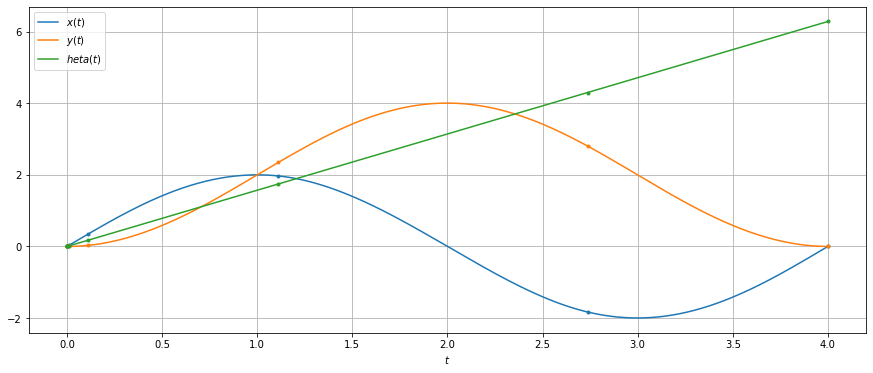

In [10]:
figure(figsize=(15,6))
t = linspace(0, 4, 1000)
plot(t, sol(t)[0], "-", label="$x(t)$")
plot(t, sol(t)[1], "-", label="$y(t)$")
plot(t, sol(t)[2], "-", label="$\theta(t)$")
plot(rt, x, ".", color="C0")
plot(rt, y, ".", color="C1")
plot(rt, theta, ".", color="C2")
xlabel("$t$"); grid(); legend()

🧩 Use the simulation results to display the robot location every 0.5 second.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

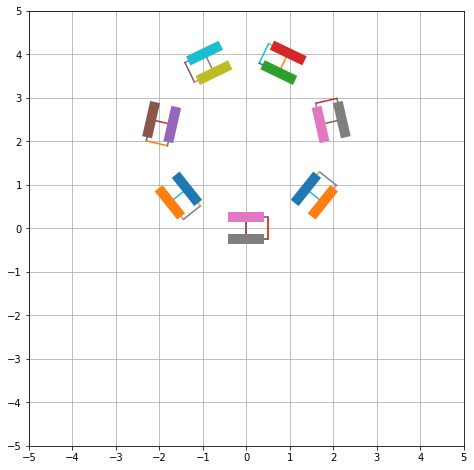

In [12]:
t = linspace(0,4,8)
x = sol(t)[0]
y = sol(t)[1]
theta = sol(t)[2]
draw_arena(-5, 5, -5, 5)
for i in range(len(t)) :   
    draw_wheelchair(x[i], y[i], theta[i])

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**


If $\omega_l$ and $\omega_r$ are constants: 
$$\quad \quad \theta(t) = \frac{R_w}{L}\left(\omega_r-\omega_l\right).t + \theta(0)\\$$
$$ \quad \quad x(t) = \frac{L}{2}\frac{\omega_r+\omega_l}{\omega_r-\omega_l} \sin(\theta(t)) + x(0)$$

$$ \quad \quad y(t) = - \frac{L}{2}\frac{\omega_r+\omega_l}{\omega_r-\omega_l} \cos(\theta(t)) + y(0)$$


🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [4]:
figure(figsize=(15,6))
t = linspace(0, 4, 1000)
omega_l = (1 - L/4) * pi / Rw
omega_r = (1 + L/4) * pi / Rw
theta_theorical = (Rw/L)*(omega_r - omega_l)*t
x_theorical = (L/2)*((omega_r + omega_l)/(omega_r - omega_l))*sin(theta_theorical) 
y_theorical = (-L/2)*((omega_r + omega_l)/(omega_r - omega_l))*cos(theta_theorical) + 2

plot(t, x_theorical, "-", label="$x(t)$")
plot(t, y_theorical, "-", label="$y(t)$")
plot(t, theta_theorical, "-", label="$\theta(t)$")
xlabel("$t$"); grid(); legend()

NameError: name 'figure' is not defined

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

In [9]:
pass